In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [29]:
#al digitar esto y control enter se obtienen algunas de las librerias a importar (si no acepta cotrol Enter es porque ya quedo en modo jupiter, aca la unica solcuion que veo es copiar el texto
# y pegarlo en el chat de copilot
# Import libraries with respect to loading data and creating a random forest model


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
#import load_data
#from pip install  import random_forest_model

In [30]:


#al digitar esto se obtienen los datos a importar
# Load the data from a csv file, and the name of the file is diabetes.csv
#data = load_data('diabetes.csv')
data=pd.read_csv('diabetes.csv', sep=",")


#al pedir operaciones amtematicas:
## Mathematical operations on the dataset, like generating the birth year from Age
data['BirthYear'] = 2021 - data['Age']

#show the data
print(data.head())

#show the content of all columns of data, 20 records
print(data.head(20))

   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23  43.509726          1.213191   21         0   
1                47            36  21.240576          0.158365   23         0   
2                52            35  41.511523          0.079019   23         0   
3                25           304  29.582192          1.282870   43         1   
4                27            35  42.604536          0.549542   22         0   

   BirthYear  
0       2000  
1       1998  
2       1998  
3       1978  
4       1999  
    PatientID 

In [31]:
#al digitar 
# convert the BMI column to two decimal values
# Assuming 'data' is your DataFrame containing the BMI column
data['BMI'] = data['BMI'].round(2)
print(data.head(20))

    PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0     1354778            0            171                      80   
1     1147438            8             92                      93   
2     1640031            7            115                      47   
3     1883350            9            103                      78   
4     1424119            1             85                      59   
5     1619297            0             82                      92   
6     1660149            0            133                      47   
7     1458769            0             67                      87   
8     1201647            8             80                      95   
9     1403912            1             72                      31   
10    1943830            1             88                      86   
11    1824483            3             94                      96   
12    1848869            5            114                     101   
13    1669231            7        

In [32]:
## Show the new column only   y control enter, genera:
print(data['BMI'])


0       43.51
1       21.24
2       41.51
3       29.58
4       42.60
        ...  
9995    18.50
9996    21.87
9997    30.77
9998    18.81
9999    38.84
Name: BMI, Length: 10000, dtype: float64


In [33]:
## Perform count, min, max, std, mean, 25%, 50%, and 75% on the dataset   genera:
summary = data.describe()
print(summary)  

          PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.000000e+04  10000.00000   10000.000000            10000.000000   
mean   1.502122e+06      3.25580     107.850200               71.207500   
std    2.892868e+05      3.40572      31.920909               16.801478   
min    1.000038e+06      0.00000      44.000000               24.000000   
25%    1.251672e+06      0.00000      84.000000               58.000000   
50%    1.504394e+06      2.00000     105.000000               72.000000   
75%    1.754608e+06      6.00000     129.000000               85.000000   
max    1.999997e+06     14.00000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count       10000.00000  10000.000000  10000.000000      10000.000000   
mean           28.81760    139.243600     31.567058          0.400944   
std            14.50648    133.777919      9.804377          0.381463   
min             7.00000     14.0

In [34]:
# Split the data into training and testing data and the column name Diabetic is the target column  y controle nter
X = data.drop('Diabetic', axis=1)  # Features
y = data['Diabetic']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


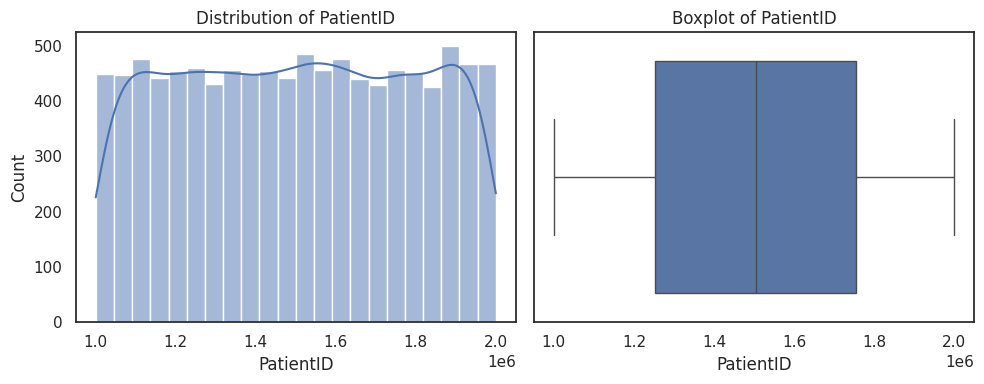

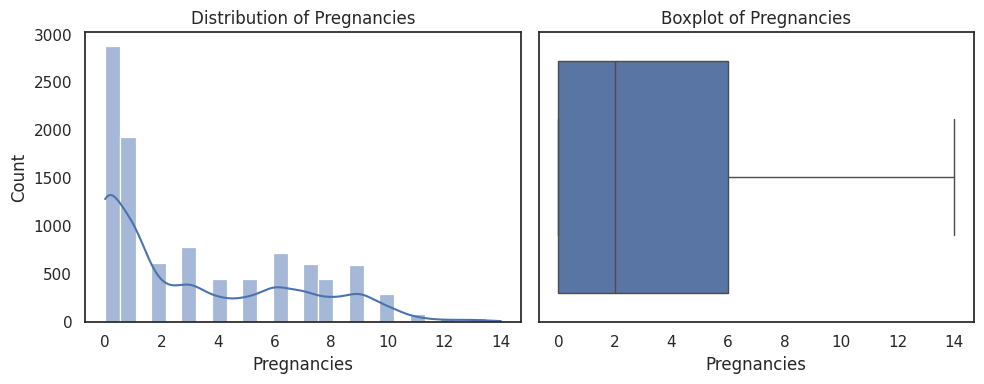

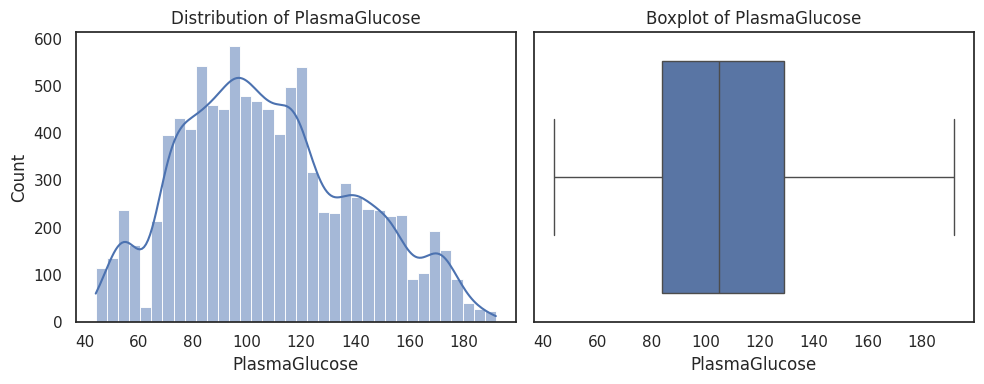

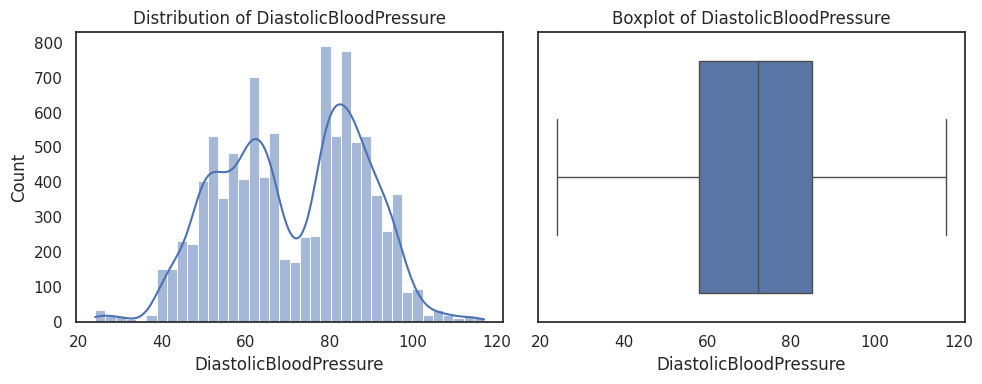

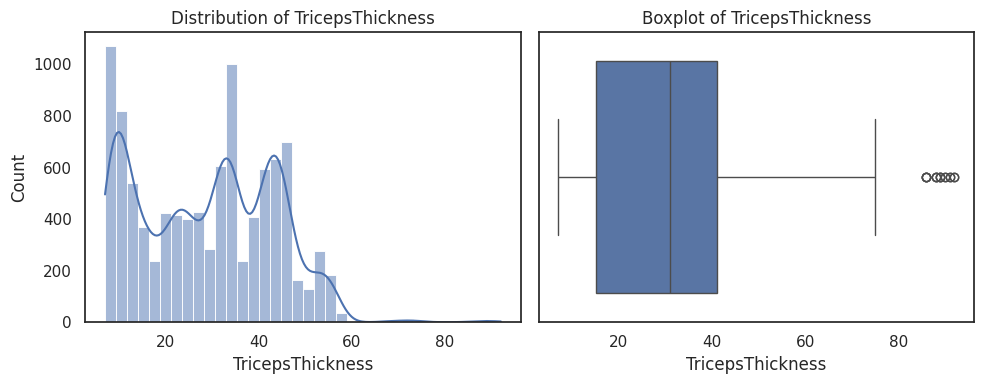

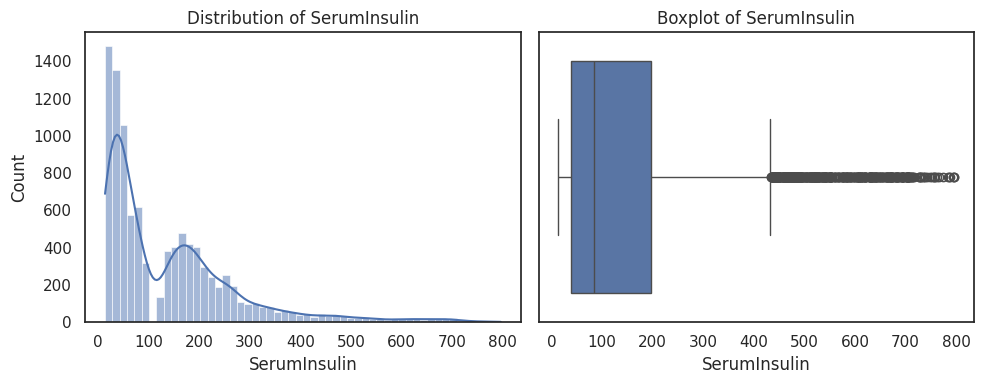

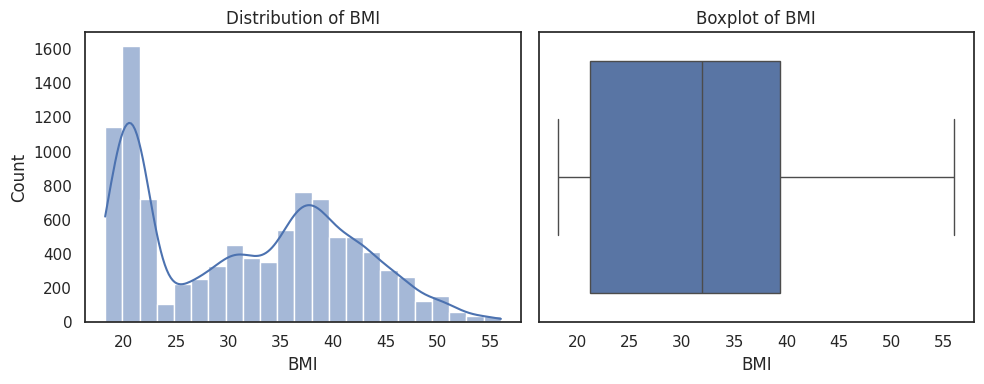

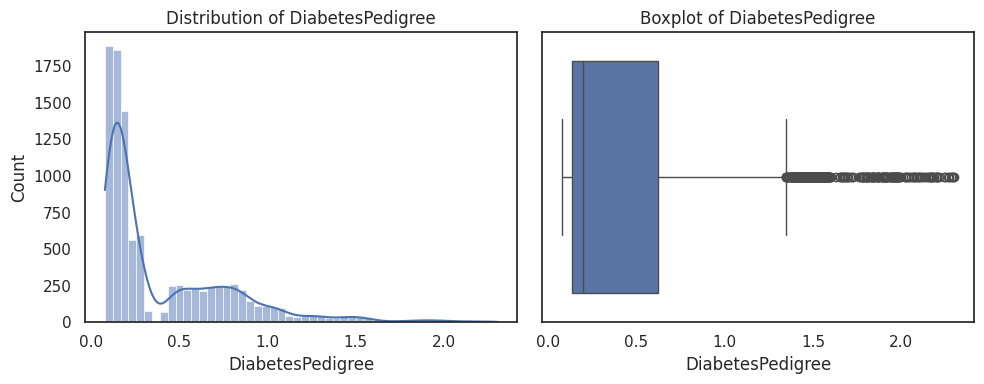

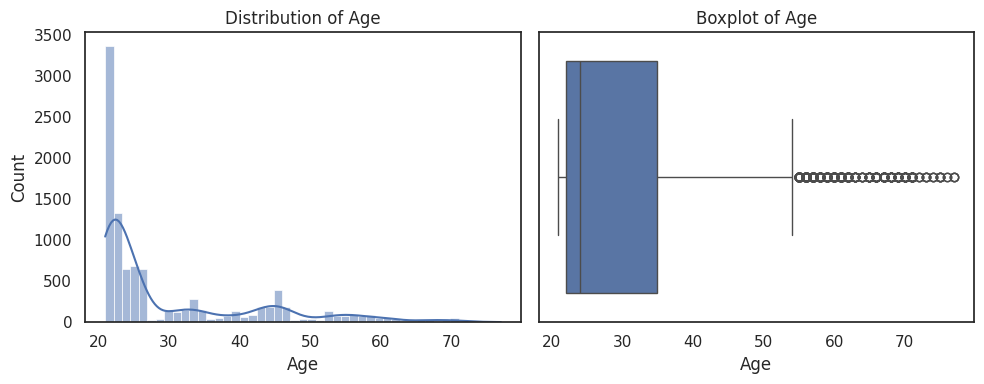

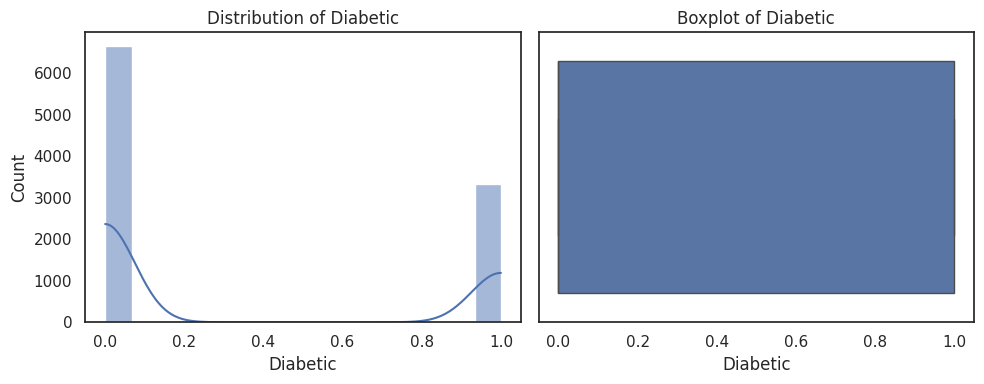

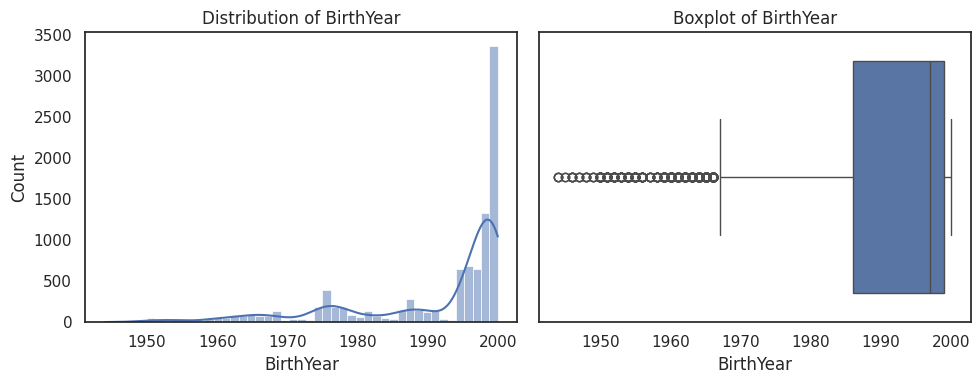

In [35]:
# Perform univariate analysis on the dataset and plot the graphs y control enter:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual file name

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Plotting for numerical data
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Plotting for categorical data
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

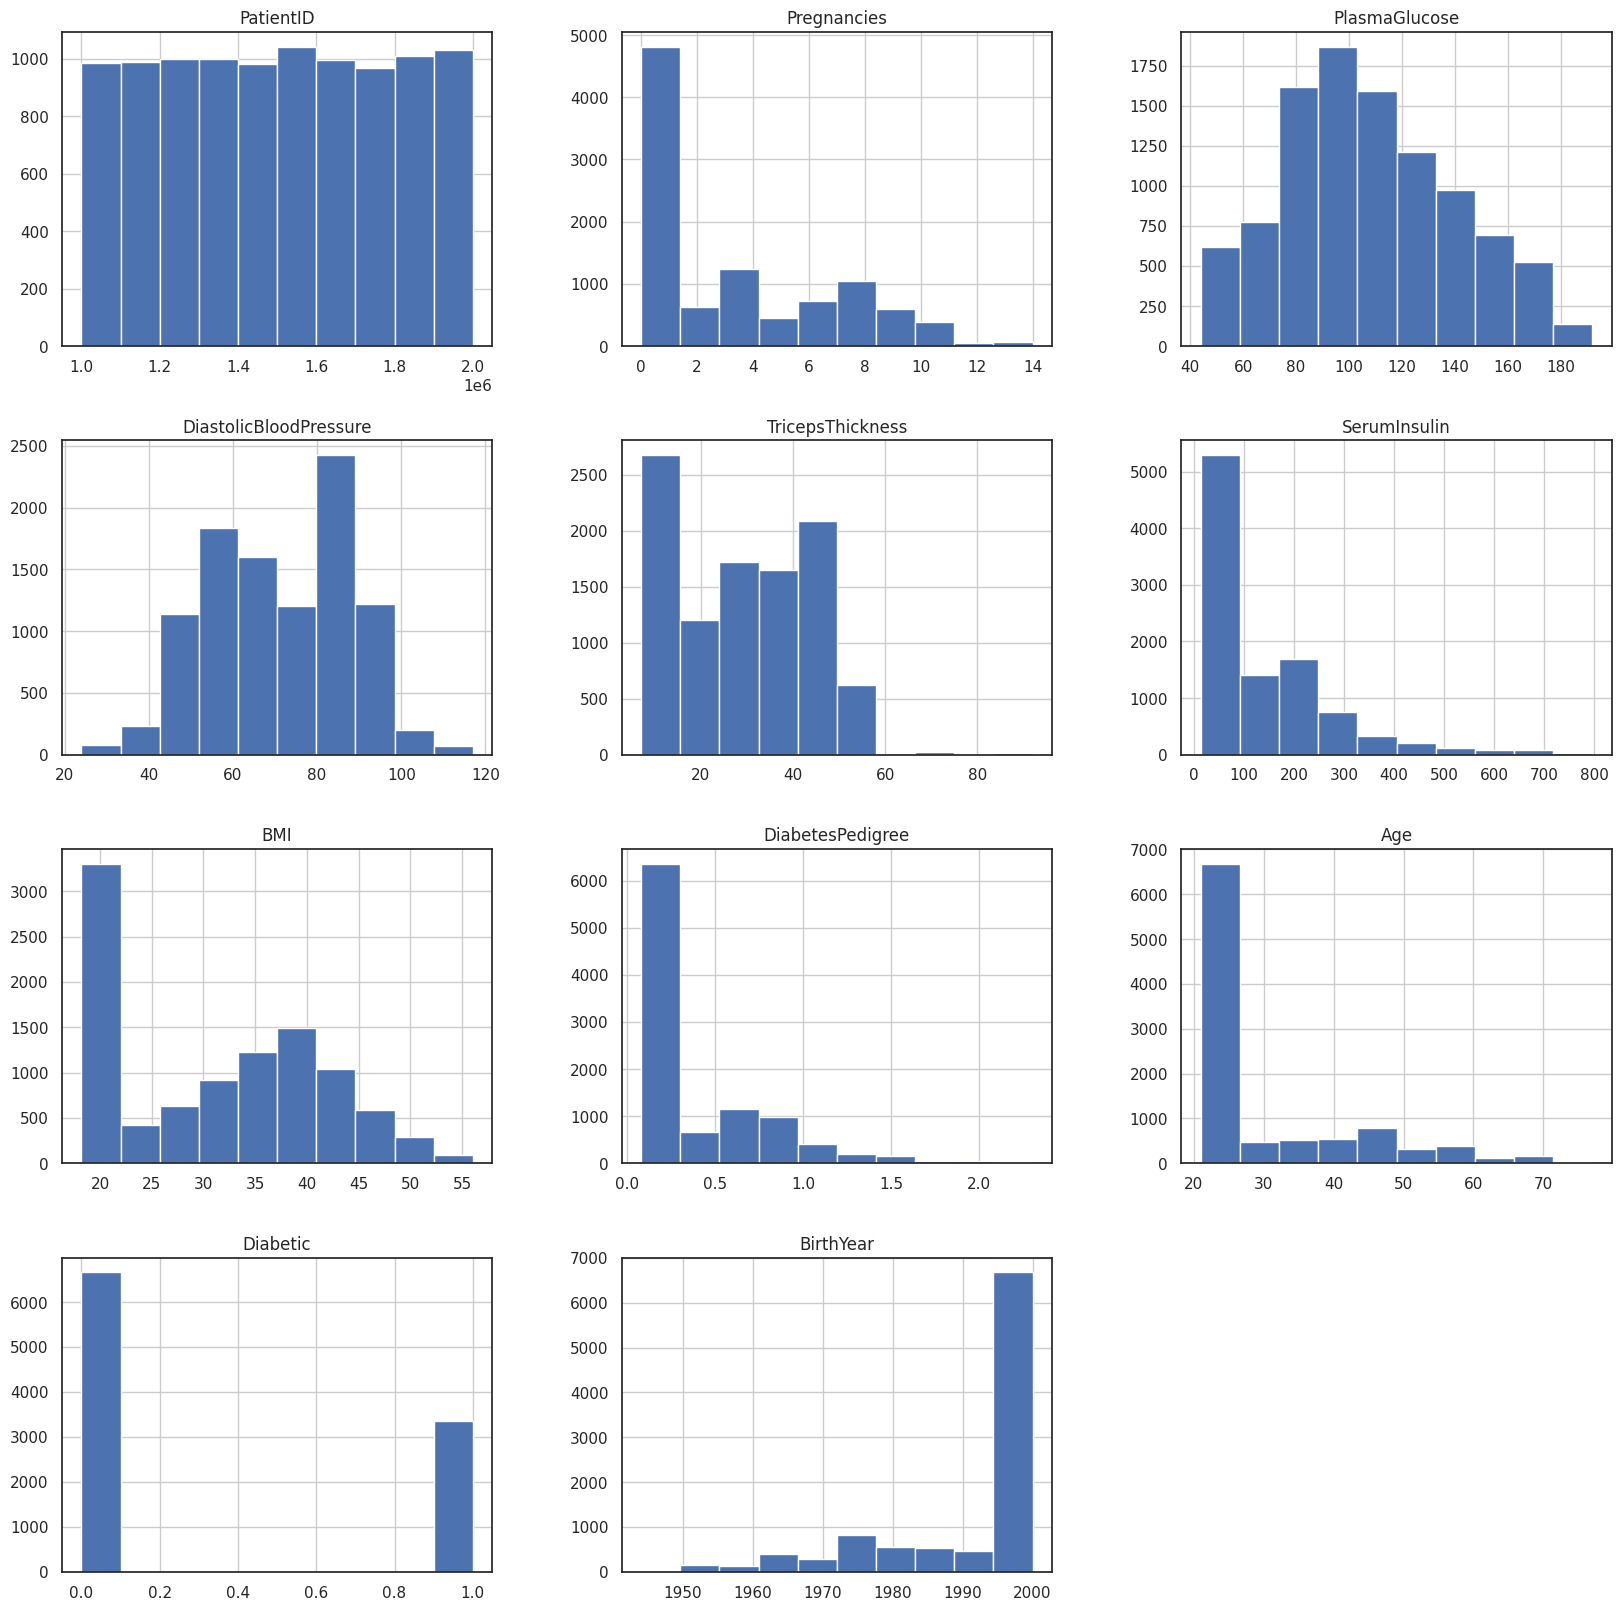

In [36]:
data.hist(figsize=(20,20))
plt.show

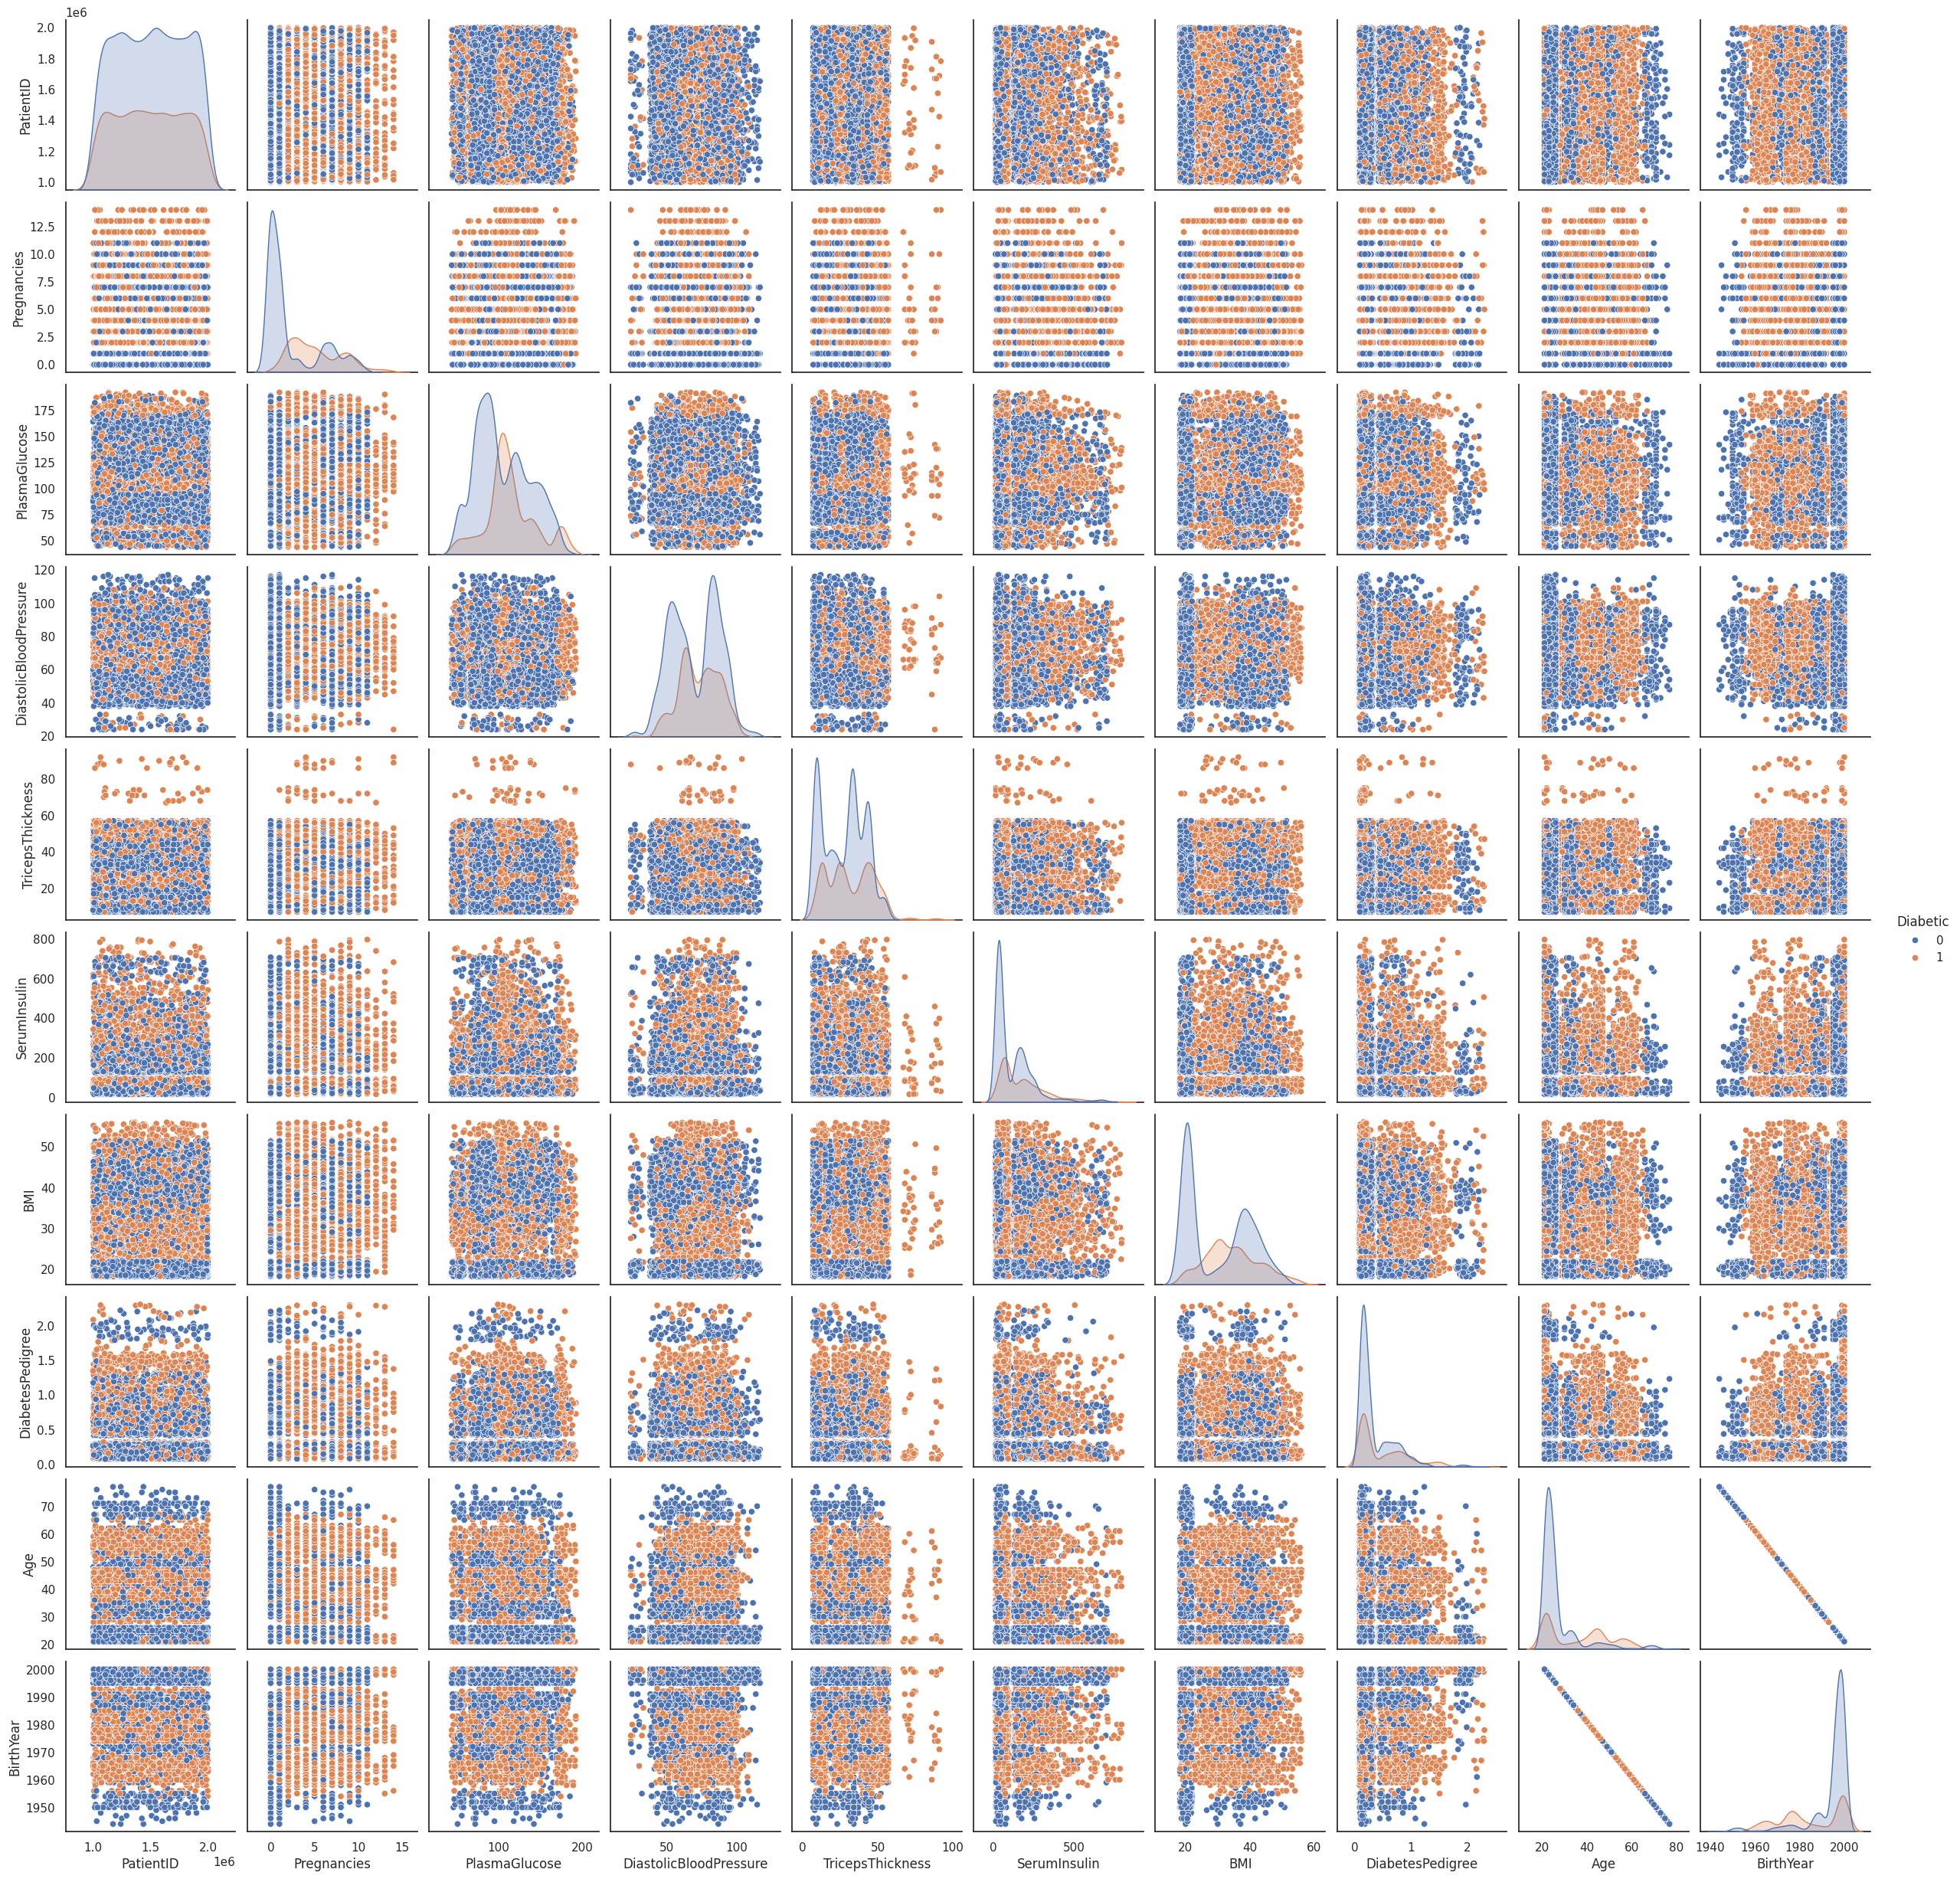

In [37]:
#al digitar   y hacer control enter
# Perform scatter plot on the dataset and plot the graphs over the dataset data
sns.pairplot(data, hue='Diabetic')
plt.show()

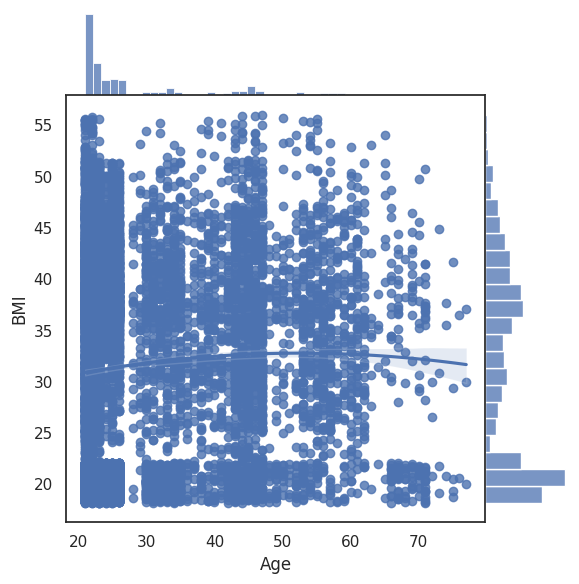

In [38]:
#al digitar esto y control enter
# Perform Joint Grid plot on the dataset and plot the graphs

#realmente no se entinede este grafico!!! toca revisarlo.

sns.set(style="white")
g=sns.JointGrid(x="Age", y="BMI", data=data, space=0)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.histplot)
plt.show()



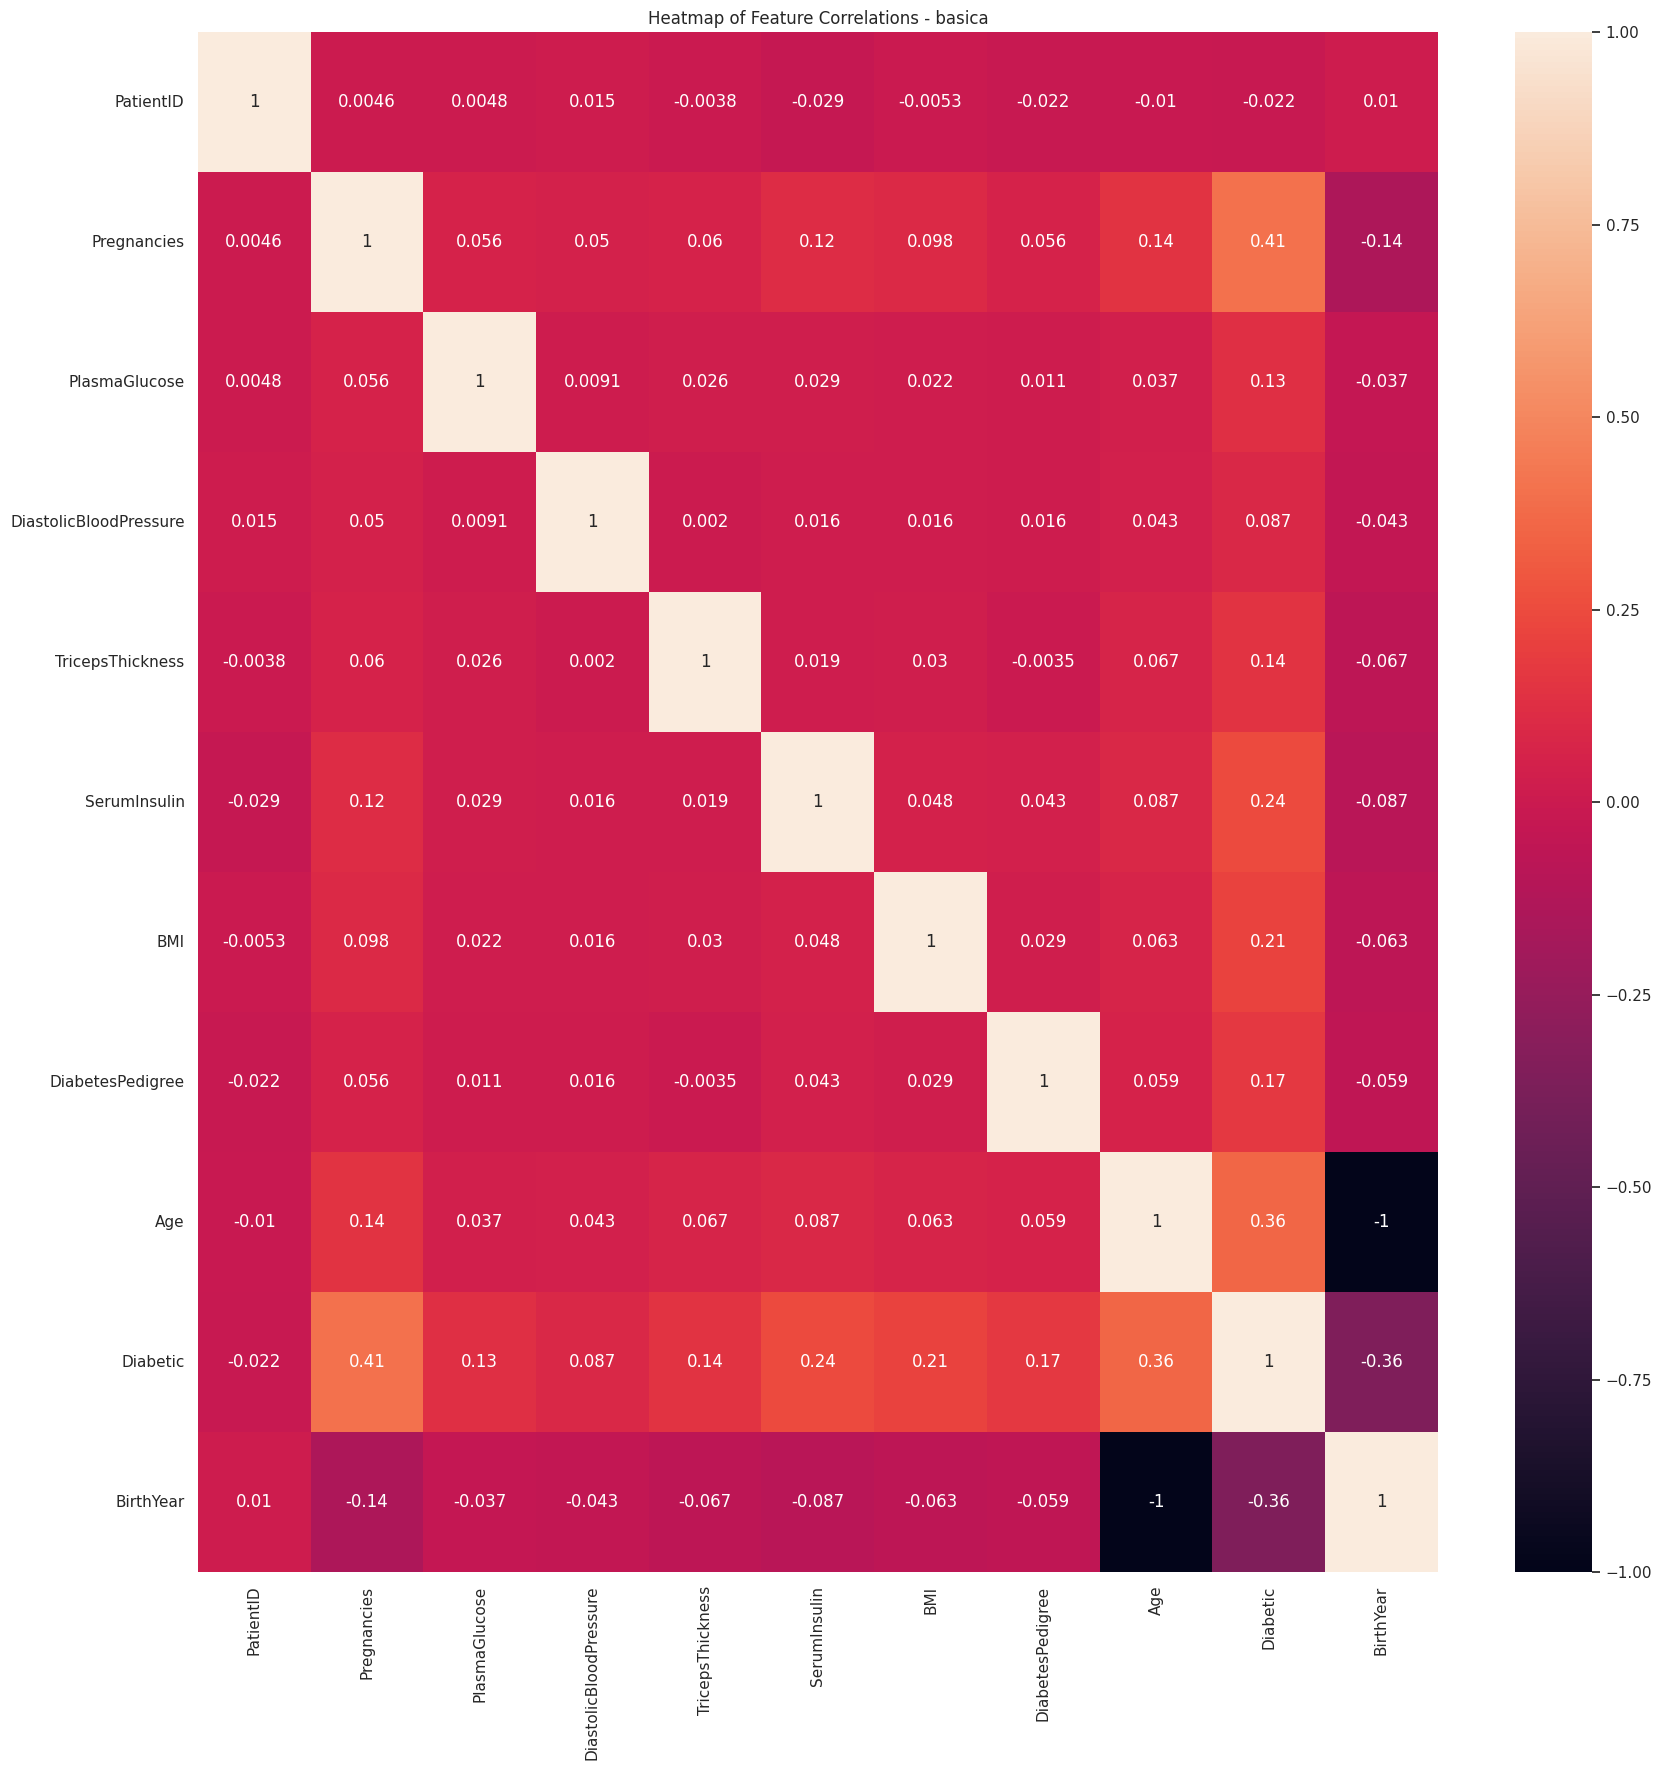

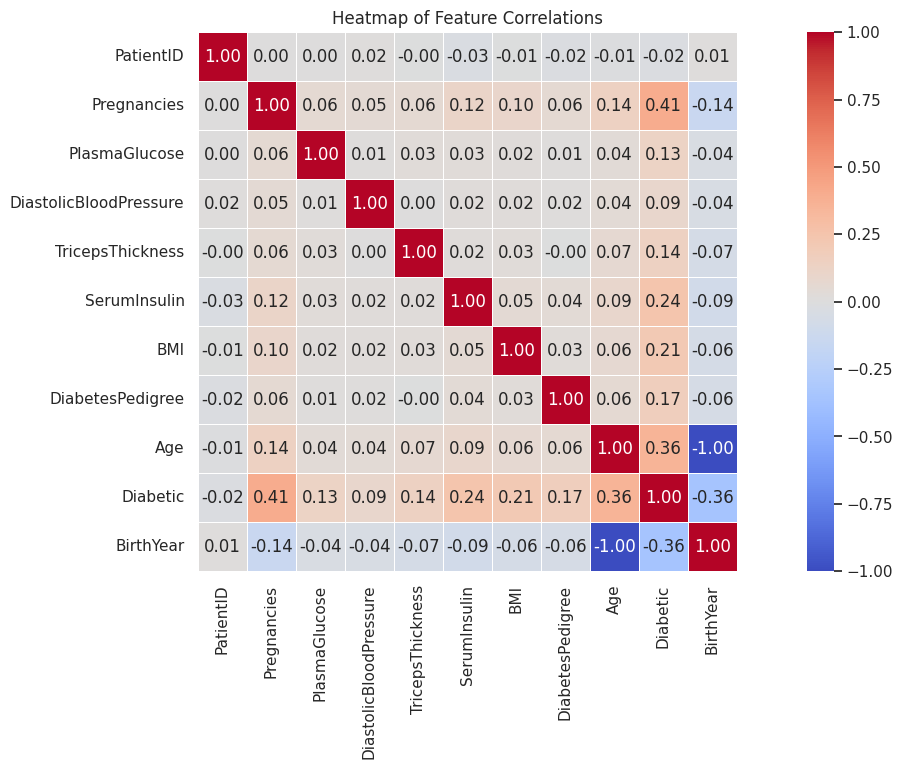

In [39]:
#al digitar y control enter
#Perform comparison on all features of the dataset and plot the graphs in a single plot using heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
correlacion = data.corr()
sns.heatmap(correlacion, annot=True)
plt.title('Heatmap of Feature Correlations - basica')
plt.show()
plt.figure(figsize=(18, 7)) 
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

Task 4.2: Data Transformations
Click + Code to add a new cell, and type the below comments for Standardization which is the process of scaling and centering numeric features to have a mean of 0 and a standard deviation of 1, making them comparable and suitable for certain algorithms,

In [40]:
#al pedir y control enter
# Perform standardization on the data
from sklearn.preprocessing import StandardScaler

# Select numerical columns (assuming all columns are numerical for this example)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

scaler.fit(data.drop('Diabetic', axis=1))
scaled_feaures=scaler.transform(data.drop('Diabetic', axis=1))


df_feat=pd.DataFrame(scaled_feaures, columns=data.columns[:-1])
df_feat.head()



# Fit the scaler to your data and transform it
#data_standardized = scaler.fit_transform(data[numerical_cols])
# Convert the array back to a pandas DataFrame (optional)
#data_standardized = pd.DataFrame(data_standardized, columns=numerical_cols)
# Now 'data_standardized' contains the standardized values of your numerical columns

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0  -0.509361    -0.956028       1.978420                0.523343   
1  -1.226125     1.393079      -0.496571                1.297123   
2   0.476744     1.099441       0.223996               -1.440868   
3   1.317886     1.686718      -0.151952                0.404300   
4  -0.269653    -0.662389      -0.715874               -0.726609   

   TricepsThickness  SerumInsulin       BMI  DiabetesPedigree       Age  \
0          0.357265     -0.868973  1.218184          2.129402 -0.754545   
1          1.253461     -0.771792 -1.053364         -0.635948 -0.589330   
2          1.598152     -0.779268  1.014184         -0.843964 -0.589330   
3         -0.263178      1.231628 -0.202681          2.312072  1.062820   
4         -0.125302     -0.779268  1.125364          0.389567 -0.671937   

   Diabetic  
0  0.754545  
1  0.589330  
2  0.589330  
3 -1.062820  
4  0.671937

Task 5: Training the sample model
Training a sample model using Random Forest.

In [41]:
# Create a random forest model with 100 trees, and the criterion is entropy
modelRF = RandomForestClassifier(n_estimators=100, criterion='entropy')
modelRF.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy')

aora se va apedir el accuracy

In [42]:
# Calculate the accuracy of the model
# Make predictions
predictions = modelRF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.927
